# Mercari Price Prediction

Mercari is Japan's biggest community powered shopping app where people can sell and buy a variety of brand new and used products of different brands, from sweaters to smartphones. Now Mercari would like to suggest the correct prices to the sellers but this is tough because their sellers are enabled to put just about anything, or any bundle of things on Mercari's marketplace.
So our objective is to build a model that automatically suggests the right product prices to the sellers. We are provided of the following information for each product:

train_id - the id of the product

name - the title of the product

item_condition_id - the condition of the product provided by the sellers

category_name - category of the product

brand_name - the product's brand name

shipping - 1 if shipping fee is paid by seller and 0 if shipping fee is paid by buyer

item_description - the full description of the product

price - the price that the product was sold for (This is the target variable that we will predict)

This type of problem lies under the category of Supervised Regression Machine Learning:
Supervised: We have access to both the features and the target and our goal is to train a model that can learn a mapping between the two.
Regression: The target variable, price, is a continuous variable.

In [ ]:
#for connecting to google drive
#!pip install -U -q pyDrive              

#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

In [ ]:
#for accessing the data file through the google drive shareable link
#train=drive.CreateFile({'id':'1mN96UKMA2lcYq7vd5_MAPG9ybttjzIIM'})
#train.GetContentFile('train.tsv')

# **Exploratory Data Analysis**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('train.tsv', sep='\t')
print(data[10:30])


data['item_condition_id'].value_counts()
print(data.shape)

    train_id                                     name  item_condition_id  \
10        10                          Smashbox primer                  2   
11        11                   New vs pi k body mists                  1   
12        12                       Black Skater dress                  2   
13        13                     Sharpener and eraser                  1   
14        14       HOLD for Dogs2016 Minnetonka boots                  3   
15        15              Sephora tarte birthday gift                  1   
16        16                        Glitter Eyeshadow                  1   
17        17      New: Baby K'tan active baby carrier                  1   
18        18      Too Faced Limited "Merry Macaroons"                  1   
19        19           Cream/ Beige Front Cross Shirt                  2   
20        20          Torrid Nautical Peplum Tube Top                  3   
21        21         NWT VS ULTIMATE SPORTS BRA 34ddd                  1   
22        22

In [ ]:
data = pd.read_csv('train.tsv', sep='\t')
train, test = train_test_split(data, test_size=0.2, shuffle=False)
print(train.shape, test.shape)
print(data.shape)
print(data.head(10))


(1186028, 8) (296507, 8)
(1482535, 8)
   train_id                                    name  item_condition_id  \
0         0     MLB Cincinnati Reds T Shirt Size XL                  3   
1         1        Razer BlackWidow Chroma Keyboard                  3   
2         2                          AVA-VIV Blouse                  1   
3         3                   Leather Horse Statues                  1   
4         4                    24K GOLD plated rose                  1   
5         5        Bundled items requested for Ruie                  3   
6         6      Acacia pacific tides santorini top                  3   
7         7    Girls cheer and tumbling bundle of 7                  3   
8         8                   Girls Nike Pro shorts                  3   
9         9  Porcelain clown doll checker pants VTG                  3   

                                       category_name       brand_name  price  \
0                                  Men/Tops/T-shirts              N

In [ ]:
data.head(5)
data['item_condition_id'].value_counts()
data.isnull().sum()
len(data)
#data.head(5)
df=data

In [ ]:
df
len(df)

1482535

In [ ]:
 # Total missing values
mis_val = df.sum()
print("missing values", mis_val)

In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        print("missing values", mis_val)
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        print("missing percentage", mis_val_percent)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent])
        print(type(mis_val_table))
       # print(type(df))
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        print(mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0])
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" +    "There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:

missing_values_table(data[0:1000])


missing values train_id               0
name                   0
item_condition_id      0
category_name          4
brand_name           418
price                  0
shipping               0
item_description       0
dtype: int64
missing percentage train_id              0.0
name                  0.0
item_condition_id     0.0
category_name         0.4
brand_name           41.8
price                 0.0
shipping              0.0
item_description      0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
               Missing Values  % of Total Values
category_name               4                0.4
brand_name                418               41.8
Your selected dataframe has 8 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
brand_name,418,41.8
category_name,4,0.4


In [ ]:
mis_val

train_id               0
name                   0
item_condition_id      0
category_name          4
brand_name           418
price                  0
shipping               0
item_description       0
dtype: int64

In [ ]:
train.info()


# **Exploratory Data Analysis**
There are a total of 8 features in this data set. The title and description of the features are follows:-

In [ ]:
print('There are a total of',train.shape[0],'observations in the train data.')

In [ ]:
train.head(5)

<h2> Price </h2>

In [ ]:
train['price'].describe().round()

In [ ]:
price = train['price'].values


In [ ]:
price = np.sort(price, axis=None)
len(price)
data['price'].isnull().count()
#print('{}th percentile value is {}'.format(90, price[int(len(price)*(float(90)/100))]))



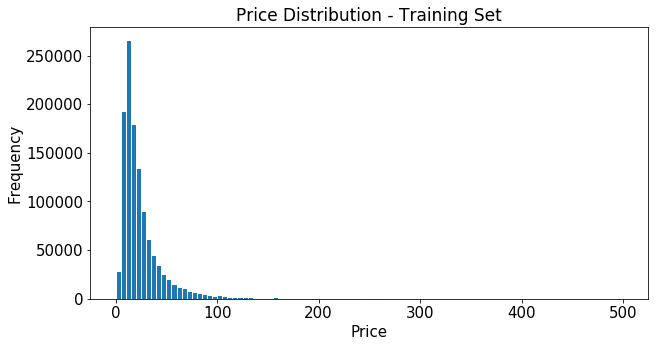

In [ ]:
train['price'].plot.hist(bins=100, figsize=(10,5), edgecolor='white',range=[0,500])
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Price Distribution - Training Set', fontsize=17)
plt.show()


Based on the the above statistics, the observations are as follows: 

*   The **median price** of the items is **17 dollars**.
*   Around **90% of the items** have price around **51 dollars or below**.
*   The **Price distribution** of the items is heavily **skewed to the right**.


In [ ]:
print(data['price'].median())
type(price)
data[data['price'] <51].isnull().count()
print(1332699/len(data)*100)

<h2> Shipping </h2>

In [ ]:
print(train['shipping'].value_counts())
train['shipping'].value_counts(normalize=True)*100

#value - mean value / std dev (which is max-min)

0    655490
1    530538
Name: shipping, dtype: int64


0    55.267667
1    44.732333
Name: shipping, dtype: float64

Figure(720x360)
AxesSubplot(0.125,0.125;0.775x0.755)


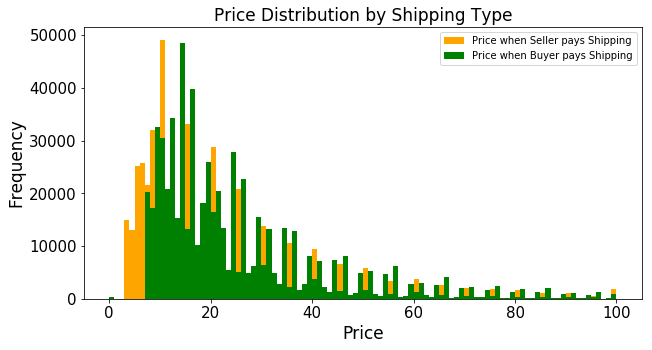

In [ ]:
#The matplotlib. pyplot. subplots method provides a way to plot multiple plots on a single figure. Given the number
#of rows and columns , it returns a tuple ( fig , ax )
#, giving a single figure fig with an array of axes ax .shipping_fee_by_seller = train.loc[train.shipping==1, 'price']

shipping_fee_by_buyer = train.loc[train.shipping==0, 'price']

fig, ax = plt.subplots(figsize=(10,5))
print(fig)
print(ax)
ax.hist(shipping_fee_by_seller, color='Orange', bins=100, range=[0,100], label='Price when Seller pays Shipping')
ax.hist(shipping_fee_by_buyer, color='Green',  bins=100, range=[0,100], label='Price when Buyer pays Shipping')
ax.set(title='Histogram Comparison', ylabel='% of Dataset in Bin')
plt.xlabel('Price', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.title('Price Distribution by Shipping Type', fontsize=17)
plt.tick_params(labelsize=15)
plt.legend()
plt.show()

In [ ]:
print('The median price is ${}'.format(round(shipping_fee_by_seller.median(), 2)), 'if seller pays shipping')
print('The median price is ${}'.format(round(shipping_fee_by_buyer.median(), 2)), 'if buyer pays shipping')

Some observations are as follows:-

*   The **shipping fee for 55%** of the **items** are **paid** by the **buyers.**
*   Normally when **we buy products online**, we **need to pay for shipping** or delivery for products which are **below a certain price.** But **here the trend is kind of opposite** since the median price of items for which the seller pays the shipping fees is lower than the median price of the items for which the buyer pays the shipping fees.   



<h2> Item Condition </h2>

The 'item_condition_id' has five unique values ranging from 1 to 5. Lower the number, better the condition of the item.

In [ ]:
train['item_condition_id'].value_counts(sort=False)*100

1    51229900
2    30034100
3    34592800
4     2553700
5      192300
Name: item_condition_id, dtype: int64

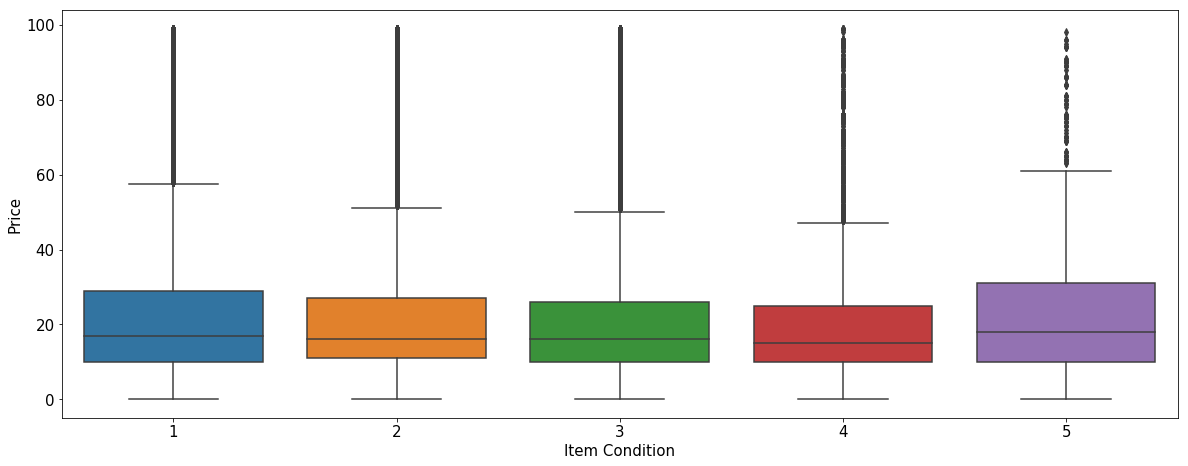

In [ ]:
price_100 = train[train['price']<100]

fig, ax = plt.subplots(figsize=(20,7.5))
sns.boxplot(x='item_condition_id', y='price', data=price_100, ax=ax)
plt.xlabel('Item Condition', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Some observations are as follows:

*   **43% of the items** have item **condition ID as 1** while only **0.16% of the items** have item **condition ID has 5.**
*   Interestingly, items with item **condition ID as 5** have **higher median price** when compared with items having better condition. 



In [ ]:
con = train[(train['item_condition_id']==5) & (train['price']>=20)]
con.head(6)

<h2> Category Name </h2>

In [ ]:
(train['category_name'].value_counts(normalize=True)*100).head(15)

As we can see, for each item, there are three sets of categories. The categories are arranged from top to bottom with respect to the comprehensiveness. Therefore we can split the categories into three different columns. The three categories will signify main category, first subcategory and second subcategory.

**As a common preprocessing practice, we will convert all the textual categorical values to lower case. The reason for doing this will be clear with the following example. Suppose there is an entry in the data and the product belonging to that entry is an iPhone 6s and the corresponding brand name belonging to that product is 'APPLE'. There is an another entry with the product iPhone 6s and the corresponding brand name given is 'Apple'. So when we featurise the data for applying the machine learning models, any featurisation technique that we will apply will consider 'APPLE' and 'Apple' has two different values eventhough they mean the same thing. So, for our model to consider these two values as one, we will convert all the textual categorical values to lower case. Effectively, 'APPLE' and 'Apple' will become 'apple' and 'apple'.**

Note:- These preprocessing steps will also be carried out on the test data, so that the train and test data both remained aligned with each other.

In [ ]:
print("There are %d unique main categories." % train['category_name'].nunique())

In [ ]:
train['main_cat'], train['subcat_1'], train['subcat_2'] = zip(*train['category_name'].apply(lambda x: split_cat(x)))


In [ ]:
def split_cat(text):
    try: return text.split("/")
    except: return ("Category Unknown", "Category Unknown", "Category Unknown")
    
train['main_cat'], train['subcat_1'], train['subcat_2'] = zip(*train['category_name'].apply(lambda x: split_cat(x)))
test['main_cat'], test['subcat_1'], test['subcat_2'] = zip(*test['category_name'].apply(lambda x: split_cat(x)))
train.head()    

In [ ]:
def lowercase_categorical_features_train(feature):
    original_list = list(train[feature].values)
    lower_case_list = []
    for i in original_list:
        j=i.lower()
        lower_case_list.append(j)
    return lower_case_list
  
def lowercase_categorical_features_test(feature):
    original_list = list(test[feature].values)
    lower_case_list = []
    for i in original_list:
        j=i.lower()
        lower_case_list.append(j)
    return lower_case_list  

In [ ]:
train['subcat_1'] = lowercase_categorical_features_train('subcat_1')
train['subcat_2'] = lowercase_categorical_features_train('subcat_2')
train['main_cat'] = lowercase_categorical_features_train('main_cat')

test['subcat_1'] = lowercase_categorical_features_test('subcat_1')
test['subcat_2'] = lowercase_categorical_features_test('subcat_2')
test['main_cat'] = lowercase_categorical_features_test('main_cat')

In [ ]:
print("There are %d unique main categories." % train['main_cat'].nunique())
print("There are %d unique first sub-categories." % train['subcat_1'].nunique())
print("There are %d unique second sub-categories." % train['subcat_2'].nunique())

In [ ]:
train['main_cat'].value_counts(normalize=True)*100

In [ ]:
(train['main_cat'].value_counts()).index

In [ ]:
fig, ax = plt.subplots(figsize=(20,7.5))
sns.countplot(train['main_cat'], ax=ax, order=(train['main_cat'].value_counts()).index)
plt.xlabel('Main Categories', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(rotation=30, fontsize=15)
plt.show()

In [ ]:
main_cat = train.groupby('main_cat')
main_cat_median = pd.DataFrame(main_cat['price'].median())
main_cat_median = main_cat_median.sort_values(ascending=True, by='price')
main_cat_median

In [ ]:
plt.figure(figsize=(15,12))
plt.barh(range(0,len(main_cat_median)), main_cat_median['price'], align='center', alpha=0.5)
plt.yticks(range(0,len(main_cat_median)), main_cat_median.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Categories sorted by median price', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.ylabel('Main Categories', fontsize=25)
plt.show()

**44.8% of the total products belong to 'Women' category followed by 'Beauty' category products which takes up around 14% of the total products while 1.7% of the products, being the minimum, belong to the 'Sports and Outdoor' category.**

**The items from 'Men' category have the highest median price of 21 dolars followed by the items from 'Women' category having a median price of 19 dollars while the items from 'Handmade' category has the lowest median price of 12 dollars.**

<h2> First Subcategory </h2>

In [ ]:
train['subcat_1'].value_counts(normalize=True).head(10)

In [ ]:
paper = train[train['subcat_1']=='paper goods']
paper.head(6)

In [ ]:
x = train['subcat_1'].value_counts().index[:10]
y = train['subcat_1'].value_counts().values[:10]

plt.figure(figsize=(15,12))
plt.barh(range(len(x),0,-1), y, align='center', alpha=0.5, color='red')
plt.yticks(range(len(x),0,-1), x, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 Most Popular First Subcategories', fontsize=25)
plt.xlabel('Count', fontsize=25)
plt.ylabel('First Sucategories', fontsize=25)
plt.show()

In [ ]:
subcat_1 = train.groupby('subcat_1')
subcat_1_median = pd.DataFrame(subcat_1['price'].median())
subcat_1_median = subcat_1_median.sort_values(ascending=True, by='price')
subcat_1_median_top = subcat_1_median[-10:]
subcat_1_median_bottom = subcat_1_median[0:10]

plt.figure(figsize=(15,12))
plt.barh(range(0,len(subcat_1_median_top)), subcat_1_median_top['price'], align='center', alpha=0.5, color='green')
plt.yticks(range(0,len(subcat_1_median_top)), subcat_1_median_top.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 First Subcategories sorted by median price', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.ylabel('First  Subcategories', fontsize=25)
plt.show()

In [ ]:
plt.figure(figsize=(15,12))
plt.barh(range(len(subcat_1_median_bottom),0,-1), subcat_1_median_bottom['price'], align='center', alpha=0.5, color='blue')
plt.yticks(range(len(subcat_1_median_bottom),0,-1), subcat_1_median_bottom.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Bottom 10 First Subcategories sorted by median price', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.ylabel('First  Subcategories', fontsize=25)
plt.show()

**The most popular subcategory is 'Athletic Apparel' which aligns with the previous observation that the most popular main category is 'Women' and 'Athletic Apparel' comes under both the 'Women' and 'Men' categories. 9% of the total products comes under the Athletic Apparel category.**

**From the perspective of the median price of the items, the items from the subcategory of 'Computers & Tablets' have the highest median price, with the median price being 40 dollars.**

**The items from the subcategory 'Paper Goods' have the lowest median price of 6 dollars. 'Paper Goods' come under the 'Handmade' category. This also validates the previous observation that the items from 'Handmade' category have the lowest median price out of all the main categories.**

In [ ]:
stand = train[train['subcat_2']=='Standard']
stand

<h2> Second Subcategory </h2>

In [ ]:
subcat_2 = train.groupby('subcat_2')
subcat_2_median = pd.DataFrame(subcat_2['price'].median())
subcat_2_median = subcat_2_median.sort_values(ascending=True, by='price')
subcat_2_median_top = subcat_2_median[-10:]
subcat_2_median_bottom = subcat_2_median[0:10]

plt.figure(figsize=(15,12))
plt.barh(range(0,len(subcat_2_median_top)), subcat_2_median_top['price'], align='center', alpha=0.5, color='green')
plt.yticks(range(0,len(subcat_2_median_top)), subcat_2_median_top.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 Second Subcategories sorted by median price', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.ylabel('Second Subcategories', fontsize=25)
plt.show()

In [ ]:
plt.figure(figsize=(15,12))
plt.barh(range(len(subcat_2_median_bottom),0,-1), subcat_2_median_bottom['price'], align='center', alpha=0.5, color='green')
plt.yticks(range(len(subcat_2_median_bottom),0,-1), subcat_2_median_bottom.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Bottom 10 Second Subcategories sorted by median price', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.ylabel('Second Subcategories', fontsize=25)
plt.show()

<h2> Brand </h2>

In [ ]:
(train['brand_name'].value_counts(normalize=True)*100).head(10)

In [ ]:
print('There are', train['brand_name'].nunique(), 'unique brands in the data')

In [ ]:
train['brand_name'] = train['brand_name'].fillna('brand_unavailable')
brand = list(train['brand_name'].values)
brand_name_given = []
for i in brand:
    if i=='brand_unavailable':
        brand_name_given.append('No')
    else:
        brand_name_given.append('Yes')
        
train['brand_name_given'] = brand_name_given   

test['brand_name'] = test['brand_name'].fillna('brand_unavailable')
brand = list(test['brand_name'].values)
brand_name_given = []
for i in brand:
    if i=='brand_unavailable':
        brand_name_given.append('No')
    else:
        brand_name_given.append('Yes')
        
test['brand_name_given'] = brand_name_given      

In [ ]:
train['brand_name'] = lowercase_categorical_features_train('brand_name')
test['brand_name'] = lowercase_categorical_features_test('brand_name')

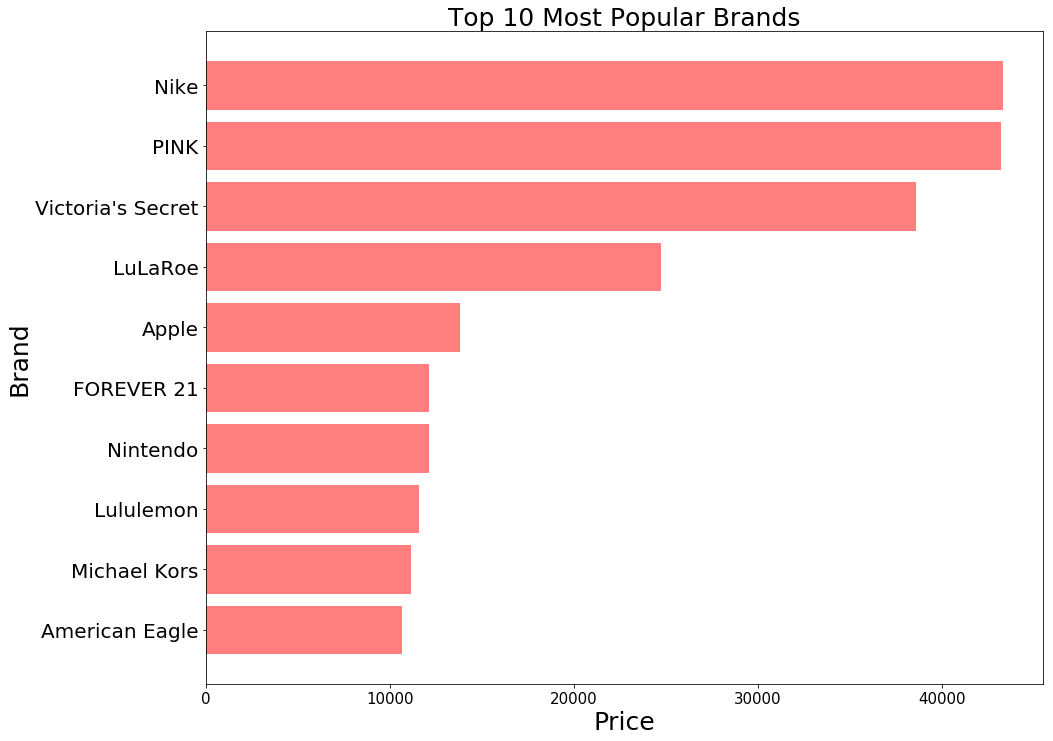

In [ ]:
brand_filled = train[train['brand_name']!='brand_unavailable']

x = brand_filled['brand_name'].value_counts().index[:10]
y = brand_filled['brand_name'].value_counts().values[:10]

plt.figure(figsize=(15,12))
plt.barh(range(len(x),0,-1), y, align='center', alpha=0.5, color='red')
plt.yticks(range(len(x),0,-1), x, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 Most Popular Brands', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.ylabel('Brand', fontsize=25)
plt.show()

**Nike and Pink are the top two most popular brands and 12.6% of the total products in the data belong to these two brands.**

In [ ]:
brand = train.groupby('brand_name')
brand_median = pd.DataFrame(brand['price'].median())
brand_median = brand_median.sort_values(ascending=True, by='price')
brand_median_top = brand_median[-10:]
brand_median_bottom = brand_median[0:10]

plt.figure(figsize=(15,12))
plt.barh(range(0,len(brand_median_top)), brand_median_top['price'], align='center', alpha=0.5, color='blue')
plt.yticks(range(0,len(brand_median_top)), brand_median_top.index, fontsize=20)
plt.xticks(fontsize=15)
plt.title('Top 10 Brands sorted by median price', fontsize=25)
plt.xlabel('Price', fontsize=25)
plt.ylabel('Brand', fontsize=25)
plt.show()

In [ ]:
price_100 = train[train['price']<100]

fig, ax = plt.subplots(figsize=(20,7.5))
sns.boxplot(x='brand_name_given', y='price', data=price_100, ax=ax)
plt.xlabel('Brand name given', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
brand_given = train.groupby('brand_name_given')
brand_given_median = pd.DataFrame(brand_given['price'].describe())
brand_given_median

**After looking at the box plots, although there is good amount of overlap, we can say that there is a considerable difference in the prices when the brand is given and when it's not given. The median price of the product when the brand name is given is 20 dollars and when the brand name is not given, the median price is 14$. In a nutshell, this feature will be helpful for the ML model to map some kind of pattern from it.**

<h2> Item Description </h2>

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords = stopwords.words('english')
print(stopwords)

In [ ]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:

from tqdm import tqdm
preprocessed_description = []
# tqdm is for printing the status bar
for description in tqdm(train['item_description'].values):
    sent = decontracted(str(description))
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_description.append(sent.lower().strip())
    
train['clean_description'] = preprocessed_description    

In [ ]:
from tqdm import tqdm
preprocessed_description = []
# tqdm is for printing the status bar
for description in tqdm(test['item_description'].values):
    sent = decontracted(str(description))
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_description.append(sent.lower().strip())
    
test['clean_description'] = preprocessed_description    

In [ ]:
no_desc = train[train['item_description']=='No description yet']
print((no_desc.shape[0]/train.shape[0])*100)

In [ ]:
quantile = pd.qcut(train['price'], 4, labels=['first_q', 'second_q', 'third_q', 'fourth_q'])
price_q = list(quantile)
train['price_q'] = price_q

price_first_quantile = train[train['price_q']=='first_q']
price_second_quantile = train[train['price_q']=='second_q']
price_third_quantile = train[train['price_q']=='third_q']
price_fourth_quantile = train[train['price_q']=='fourth_q']

print(price_first_quantile.shape, price_second_quantile.shape, price_third_quantile.shape, price_fourth_quantile.shape)

In [ ]:
wordcloud_1 = WordCloud(width=800, height=800, background_color='white',stopwords=stopwords,max_words=300, min_font_size=10).generate(''.join(str(price_first_quantile['clean_description'])))
plt.figure(figsize=(5,5), facecolor=None)
plt.imshow(wordcloud_1)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

wordcloud_2 = WordCloud(width=800, height=800, background_color='white',stopwords=stopwords,max_words=300, min_font_size=10).generate(''.join(str(price_second_quantile['clean_description'])))
plt.figure(figsize=(5,5), facecolor=None)
plt.imshow(wordcloud_2)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

wordcloud_3 = WordCloud(width=800, height=800, background_color='white',stopwords=stopwords,max_words=300, min_font_size=10).generate(''.join(str(price_third_quantile['clean_description'])))
plt.figure(figsize=(5,5), facecolor=None)
plt.imshow(wordcloud_3)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

wordcloud_4 = WordCloud(width=800, height=800, background_color='white',stopwords=stopwords,max_words=300, min_font_size=10).generate(''.join(str(price_fourth_quantile['clean_description'])))
plt.figure(figsize=(5,5), facecolor=None)
plt.imshow(wordcloud_4)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [ ]:
item_description = list(train['item_description'].values)
description_availability = []
for i in item_description:
    if i=='No description yet':
        description_availability.append('No')
    else:
        description_availability.append('Yes')
        
train['description_given'] = description_availability      

item_description = list(test['item_description'].values)
description_availability = []
for i in item_description:
    if i=='No description yet':
        description_availability.append('No')
    else:
        description_availability.append('Yes')
        
test['description_given'] = description_availability      

In [ ]:
price_100 = train[train['price']<100]

fig, ax = plt.subplots(figsize=(20,7.5))
sns.boxplot(x='description_given', y='price', data=price_100, ax=ax)
plt.xlabel('Description given', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
desc_given = train.groupby('description_given')
desc_given_median = pd.DataFrame(desc_given['price'].describe())
desc_given_median

In [ ]:
print(train.shape, test.shape)

In [ ]:
#save the train and test data to pickle files to preserve the operations done till now and for further use during modelling
train.to_pickle('mercari_train')
test.to_pickle('mercari_test')

In [ ]:
x_train, x_test = train.drop(['price'], axis=1), test.drop(['price'], axis=1)
y_train, y_test = train['price'], test['price']

<h2> Feature Engineering </h2>

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def onehot_encoding(feature):
    encoder = OneHotEncoder(handle_unknown='ignore')
    x_train_onehot = encoder.fit_transform(x_train[feature].values.reshape(-1,1))
    x_test_onehot = encoder.transform(x_test[feature].values.reshape(-1,1))
    return x_train_onehot, x_test_onehot
  
x_train_condition, x_test_condition = onehot_encoding('item_condition_id')
print(x_train_condition.shape, x_test_condition.shape)

In [ ]:
x_train_brand, x_test_brand = onehot_encoding('brand_name')
x_train_brand_given, x_test_brand_given = onehot_encoding('brand_name_given')
x_train_condition, x_test_condition = onehot_encoding('item_condition_id')
x_train_shipping, x_test_shipping = onehot_encoding('shipping')
x_train_main_cat, x_test_main_cat = onehot_encoding('main_cat')
x_train_subcat_1, x_test_subcat_1 = onehot_encoding('subcat_1')
x_train_subcat_2, x_test_subcat_2 = onehot_encoding('subcat_2')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer(min_df=10, ngram_range=(1,2), binary=True)
x_train_bow_desc = bow.fit_transform(x_train['clean_description'])
x_test_bow_desc = bow.transform(x_test['clean_description'])

features_list.extend(bow.get_feature_names())
len(features_list)

In [ ]:
from scipy.sparse import hstack
x_train_final = hstack((x_train_brand, x_train_brand_given, x_train_condition, x_train_shipping, x_train_main_cat, x_train_subcat_1, x_train_subcat_2, x_train_bow_desc))
x_test_final = hstack((x_test_brand, x_test_brand_given, x_test_condition, x_test_shipping, x_test_main_cat, x_test_subcat_1, x_test_subcat_2, x_test_bow_desc))

print(x_train_final.shape, x_test_final.shape)

<h2> Evaluation Metric and Baseline Model </h2>

In [ ]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

y_train_mean = y_train_log.mean() #for baseline prediction

from sklearn.metrics import mean_squared_error
def rmsle(y_test, y_pred):  
    return (np.sqrt(((y_test-y_pred)**2).mean())).round(4)
    return result
  
baseline_result = rmsle(y_test_log, y_train_mean)
baseline_result  

In [ ]:
y_train_log = np.log1p(y_train)

In [ ]:
from sklearn.metrics import mean_squared_log_error
def get_rmsle(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(np.expm1(y_true), np.expm1(y_pred)))

<h2> Implementing Machine Learning Models </h2>

<h3> Linear Regression </h3>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

LR = SGDRegressor(loss='squared_loss', random_state=42)
alpha = [10**i for i in range(-7,2)]
params = {'alpha':alpha}
RS_LR = RandomizedSearchCV(LR, params, scoring='neg_mean_squared_error', cv=4, n_jobs=-1, random_state=42)
RS_LR.fit(x_train_final, y_train_log)
RS_LR.best_params_

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_log_error
LR = SGDRegressor(loss='squared_loss', alpha=1e-07, random_state=42)
LR.fit(x_train_final, y_train_log)
y_pred_lr = LR.predict(x_test_final)

lr_error = rmsle(y_test_log, y_pred_lr)
lr_error

<h3> Support Vector Regression </h3>

In [ ]:
SVR = SGDRegressor(loss='epsilon_insensitive', random_state=42)
alpha = [10**i for i in range(-7,2)]
params = {'alpha':alpha}
RS_SVR = RandomizedSearchCV(SVR, params, scoring='neg_mean_squared_error', cv=4, n_jobs=-1, random_state=42)
RS_SVR.fit(x_train_final, y_train_log)
RS_SVR.best_params_

In [ ]:
SVR = SGDRegressor(loss='epsilon_insensitive', alpha=1e-04, random_state=42)
SVR.fit(x_train_final, y_train_log)
y_pred_svr = SVR.predict(x_test_final)

svr_error = rmsle(y_test_log, y_pred_svr)
svr_error

<h3> XGBoost Regression </h3>

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

XGB = xgb.XGBRegressor(random_state=42)
max_depth = [2,4,7,10]
n_estimators = [5,10,25,50,100]
params = {'n_estimators':n_estimators, 'max_depth':max_depth}
RS_XGB = RandomizedSearchCV(XGB, params, scoring='neg_mean_squared_error', cv=4, n_jobs=-1, random_state=42)
RS_XGB.fit(x_train_final, y_train_log)
RS_XGB.best_params_

In [ ]:
XGB = xgb.XGBRegressor(n_estimators=100, max_depth=10, n_jobs=-1, random_state=42)
XGB.fit(x_train_final, y_train_log)
y_test_pred_xgb = XGB.predict(x_test_final)

xgb_error = rmsle(y_test_log, y_test_pred_xgb)
xgb_error

<h3> Decision Tree Regression </h3>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

DT = DecisionTreeRegressor(random_state=42)
min_samples_split = [25,50,75,100,200]
max_depth = [5,10,20,30,50]
params = {'max_depth':max_depth, 'min_samples_split':min_samples_split}
RS_DT = RandomizedSearchCV(DT, params, scoring='neg_mean_squared_error', cv=4, n_jobs=-1, random_state=42)
RS_DT.fit(x_train_final, y_train_log)
RS_DT.best_params_

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

DT = DecisionTreeRegressor(max_depth=30, min_samples_split=50, random_state=42)
DT.fit(x_train_final, y_train_log)
y_pred_dt = DT.predict(x_test_final)

dt_error = rmsle(y_test_log, y_pred_dt)
dt_error

<h2> Results Summary </h2>

In [ ]:
from prettytable import PrettyTable
pt = PrettyTable()
pt.field_names = ['Model', 'RMSLE']
pt.add_row(['Linear Regression', str(lr_error)])
pt.add_row(['Support Vector Regression', str(svr_error)])
pt.add_row(['Decision Tree Regression', str(dt_error)])
pt.add_row(['XGBoost Regression', str(xgb_error)])
print(pt)